In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.shape

(150, 6)

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## 1. Missing Values

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 2. Duplicates

In [8]:
duplicate = df.duplicated()
sum(duplicate)

0

## 3. Zero Variance

In [9]:
df['SepalWidthCm'].var()
# df.var() == 0
# df.var(axis = 0) == 0

0.1880040268456376

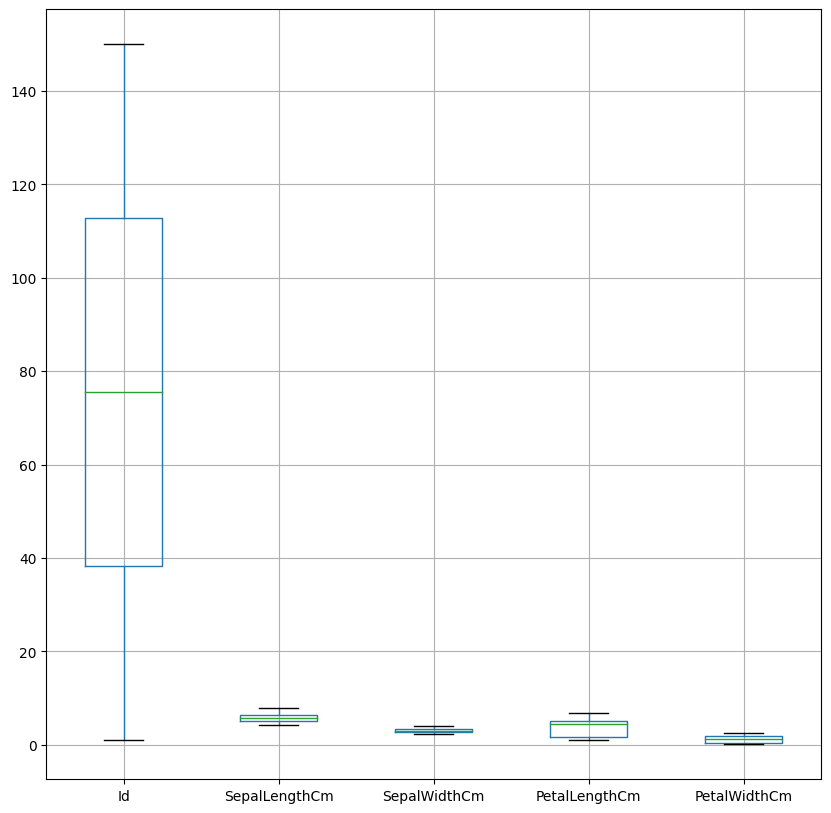

In [18]:
df.boxplot(figsize = (10, 10))
plt.show()

In [11]:
Q3 = df['SepalWidthCm'].quantile(0.75)
Q1 = df['SepalWidthCm'].quantile(0.25)

IQR = Q3 - Q1

upper_limit = Q3 + (IQR * 1.5)
lower_limit = Q1 - (IQR * 1.5)

In [12]:
df['SepalWidthCm'] = np.where((df['SepalWidthCm'] > upper_limit) | (df['SepalWidthCm'] < lower_limit), df['SepalWidthCm'].mean(), df['SepalWidthCm'])


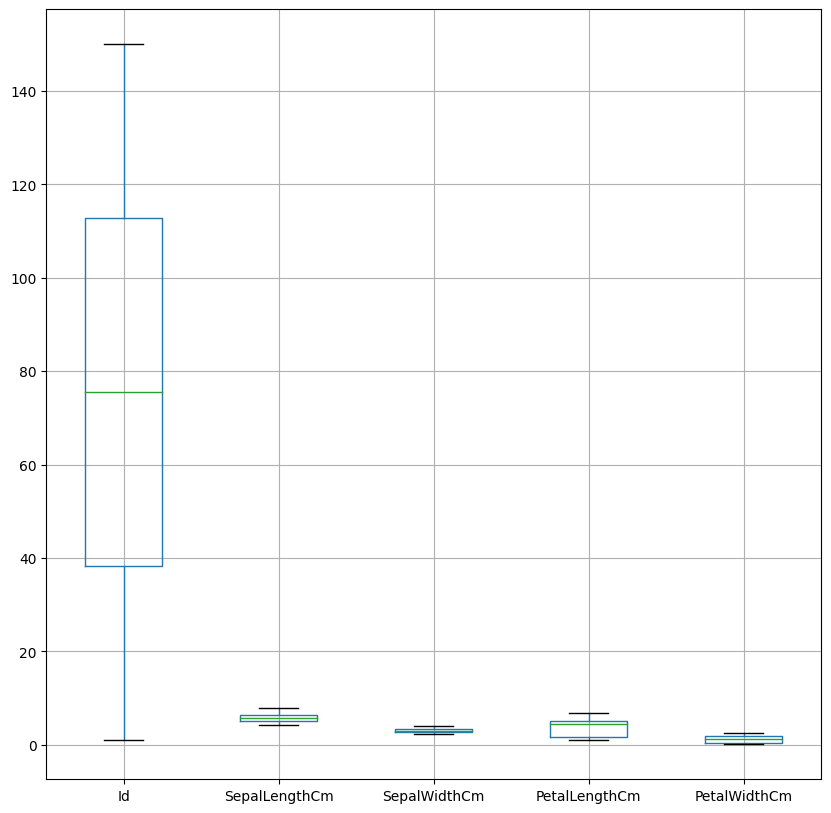

In [16]:
df.boxplot(figsize = (10, 10))
plt.show()

# Model Training

In [19]:
# Split the Data
x = df.drop(['Species'], axis = 1)
y = df['Species']

In [20]:
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [21]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

## Import

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [24]:
'''sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)'''

'sc = StandardScaler()\nx_train = sc.fit_transform(x_train)\nx_test = sc.transform(x_test)'

## Fitting the model by training data

In [25]:
classifier = MultinomialNB()

In [26]:
classifier.fit(x_train, y_train) # model is being Trained

MultinomialNB()

## Train Accuracy

In [27]:
classifier.score(x_train, y_train)

0.8

## Test Accuracy

In [28]:
y_pred = classifier.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa'], dtype='<U15')

In [29]:
classifier.score(x_test, y_test)

0.8333333333333334

In [30]:
classifier.score(x_test, y_pred)

1.0

## Classification Report And Confusion Matrix

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  1  0]
 [ 0 10  3]
 [ 0  1  5]]


In [32]:
report = classification_report(y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        11
Iris-versicolor       0.83      0.77      0.80        13
 Iris-virginica       0.62      0.83      0.71         6

       accuracy                           0.83        30
      macro avg       0.82      0.84      0.82        30
   weighted avg       0.85      0.83      0.84        30



# Gaussian NB

In [33]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train) # model is being Trained

GaussianNB()

In [34]:
# train Accuracy
gnb.score(x_train, y_train)

0.9916666666666667

In [35]:
# Test Accuracy
y_pred = gnb.predict(x_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype='<U15')

In [36]:
gnb.score(x_test, y_pred)

1.0

## Classification Report And Confusion Matrix


In [37]:
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [38]:
report2 = classification_report(y_test, y_pred)
print(report2)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

